In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('MN-DS-news-classification.csv')
df['data_id'] = range(1, df.shape[0] + 1)

In [3]:
df.head()

,data_id,id,date,source,title,content,author,url,published,published_utc,collection_utc,category_level_1,category_level_2
0,1,abcnews--2019-10-31--Virginia mom charged with...,2019-10-31,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"Thu, 31 Oct 2019 16:49:56 -0400",1572554996,1572559512,"crime, law and justice",crime
1,2,abcnews--2019-11-07--2 escaped murder suspects...,2019-11-07,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"Thu, 07 Nov 2019 00:13:12 -0500",1573103592,1573131986,"crime, law and justice",crime
2,3,abcnews--2019-11-07--Family turns in escaped b...,2019-11-07,abcnews,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,NaN,https://abcnews.go.com/US/wireStory/family-tur...,"Thu, 07 Nov 2019 07:39:54 -0500",1573130394,1573131982,"crime, law and justice",crime
3,4,abcnews--2019-12-02--Mother charged with murde...,2019-12-02,abcnews,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,NaN,https://abcnews.go.com/US/wireStory/mother-cha...,"Mon, 02 Dec 2019 11:30:59 -0500",1575304259,1575308811,"crime, law and justice",crime
4,5,ageofautism--2019-04-12--Physician Father and ...,2019-04-12,ageofautism,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/...,2019-04-12 09:00:00+00:00,1555074000,1567543083,"crime, law and justice",crime


In [4]:
df.shape

(10917, 13)

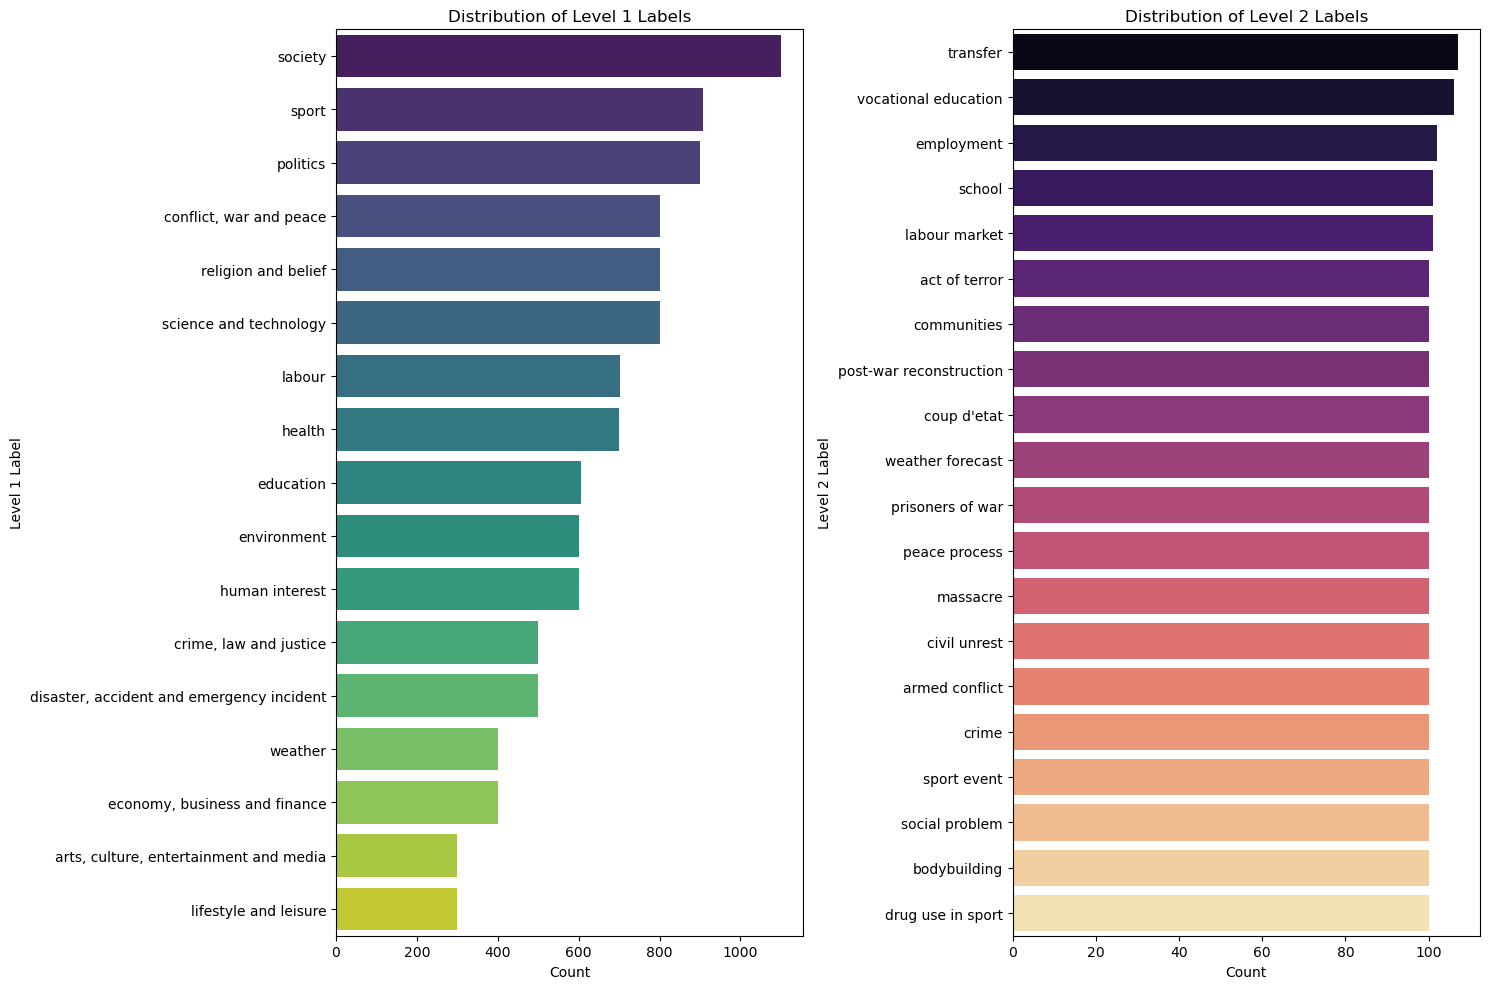

In [5]:
level_1_counts = df['category_level_1'].value_counts()
level_2_counts = df['category_level_2'].value_counts()

# Set up the matplotlib figure (you can adjust the size as needed)
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Plot level 1 distribution
sns.barplot(x=level_1_counts.values, y=level_1_counts.index, ax=axs[0], palette="viridis")
axs[0].set_title('Distribution of Level 1 Labels')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Level 1 Label')

# Plot level 2 distribution
# Due to potentially large number of subcategories, you might want to display top N
TOP_N = 20  # Show top 20 subcategories, for instance
sns.barplot(x=level_2_counts.values[:TOP_N], y=level_2_counts.index[:TOP_N], ax=axs[1], palette="magma")
axs[1].set_title('Distribution of Level 2 Labels')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Level 2 Label')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [6]:
label_encoder_level1 = LabelEncoder()
label_encoder_level2 = LabelEncoder()
df['encoded_level_1'] = label_encoder_level1.fit_transform(df['category_level_1'])
df['encoded_level_2'] = label_encoder_level2.fit_transform(df['category_level_2'])

In [7]:
# Random guessing
np.random.seed(42)
num_classes_level1 = len(label_encoder_level1.classes_)
random_guess_level1 = np.random.randint(num_classes_level1, size=(len(df),3))

num_classes_level2 = len(label_encoder_level2.classes_)
random_guess_level2 = np.random.randint(num_classes_level2, size=(len(df),3))


In [8]:
precision, recall, f1, _ = precision_recall_fscore_support(df['encoded_level_1'], random_guess_level1[:,0], average='weighted')

print("Precision level-1:", precision)
print("Recall level-1:", recall)
print("F1-score level-1:", f1)

Precision level-1: 0.06135633406478338
Recall level-1: 0.05605935696619951
F1-score level-1: 0.05736177435548311


In [9]:
def top3_precision_recall_f1(y_true, y_pred_proba):

    # Initialize lists to store precision, recall, and F1 scores
    precision_scores = []
    pred_len = len(y_pred_proba[0])

    # Calculate precision, recall, and F1 score for each sample
    for i in range(len(y_true)):
        true_label = y_true[i]
        pred_labels = y_pred_proba[i]
        true_positive = 0

        for j in pred_labels:
            if j == true_label:
                true_positive += 1

        # Calculate precision
        precision = true_positive / pred_len  # Top 3 predictions
        precision_scores.append(precision)


    # Average precision, recall, and F1 score
    avg_precision = np.mean(precision_scores)

    return avg_precision


# Calculate top-3 precision, recall, and F1 score
top3_precision = top3_precision_recall_f1(df['encoded_level_1'], random_guess_level1)
print("Top-3 Precision:", top3_precision)

Top-3 Precision: 0.05804402918994839


In [11]:
def calculate_combined_metrics(true_level1_labels, true_level2_labels, pred_level1_labels, pred_level2_labels):
    combined_labels = []
    combined_preds = []
    for label1, label2 in zip(true_level1_labels, true_level2_labels):
        combined_label = f"{label1}-{label2}"  # Combine both labels (e.g., "level1-level2")
        combined_labels.append(combined_label)
    
    for label1, label2 in zip(pred_level1_labels, pred_level2_labels):
        combined_pred = f"{label1}-{label2}"
        combined_preds.append(combined_pred)

    precision, recall, f1, _ = precision_recall_fscore_support(combined_labels, combined_preds, average='weighted',zero_division=np.nan)
    return precision, recall, f1

In [12]:
precision_combined, recall_combined, f1_combined = calculate_combined_metrics(df['encoded_level_1'], df['encoded_level_2'], random_guess_level1[:,0], random_guess_level2[:,0])

# Print combined metrics
print("Combined Precision:", precision_combined)
print("Combined Recall:", recall_combined)
print("Combined F1 Score:", f1_combined)

Combined Precision: 0.010887344770279642
Combined Recall: 0.0007328020518457452
Combined F1 Score: 0.0013721344510084963


In [13]:
## baseline of frequency
np.random.seed(42)
predictions_level_1 = []
predictions_level_2 = []

label_counts_1 = df['encoded_level_1'].value_counts(normalize=True)
label_counts_2 = df['encoded_level_1'].value_counts(normalize=True)
for i in range(3):
    
    predictions_level_1.append(np.random.choice(label_counts_1.index, size=len(df), p=label_counts_1.values))
    predictions_level_2.append(np.random.choice(label_counts_2.index, size=len(df), p=label_counts_2.values))

predictions_level_1 = np.array(predictions_level_1).T
predictions_level_2 = np.array(predictions_level_2).T

In [14]:
precision, recall, f1, _ = precision_recall_fscore_support(df['encoded_level_1'], predictions_level_1[:,0], average='weighted')

print("Precision level-1:", precision)
print("Recall level-1:", recall)
print("F1-score level-1:", f1)

Precision level-1: 0.06787742533976292
Recall level-1: 0.06824219107813502
F1-score level-1: 0.06804411056242325


In [15]:
top3_precision = top3_precision_recall_f1(df['encoded_level_1'], predictions_level_1)
print("Top-3 Precision:", top3_precision)

Top-3 Precision: 0.06750938902628928


In [16]:
precision_combined, recall_combined, f1_combined = calculate_combined_metrics(df['encoded_level_1'], df['encoded_level_2'], predictions_level_1[:,0], predictions_level_2[:,0])

# Print combined metrics
print("Combined Precision:", precision_combined)
print("Combined Recall:", recall_combined)
print("Combined F1 Score:", f1_combined)

Combined Precision: 0.010366931918656055
Combined Recall: 0.000641201795365027
Combined F1 Score: 0.0008954550139021696
